##Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Exploratory Data Anlysis

In [2]:
dataset = pd.read_csv("mcdonalds.csv")

features = list(dataset.columns.values)
print(features)

dimensions = dataset.shape
print(dimensions)

info = dataset.info()
print(info)

starting_3 = dataset.iloc[:3]
print(starting_3)


['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']
(1453, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender    

##Principle Component Analysis

In [3]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder() 
yes_no_features = dataset.drop(['Like','Age','VisitFrequency','Gender'], axis=1)
labels= ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
for label in labels:
    yes_no_features[label] = lb.fit_transform(yes_no_features[label])
for label in labels:
    print(yes_no_features[label].describe())
    

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(yes_no_features)

count    1453.000000
mean        0.552650
std         0.497391
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: yummy, dtype: float64
count    1453.000000
mean        0.907777
std         0.289440
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: convenient, dtype: float64
count    1453.000000
mean        0.093599
std         0.291371
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: spicy, dtype: float64
count    1453.000000
mean        0.867171
std         0.339506
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: fattening, dtype: float64
count    1453.000000
mean        0.526497
std         0.499469
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: greasy, dtype: float64
count    1

PCA()

##Explained Variance, Explained Variance Ratio and Standard Deviation

In [4]:
print("Explained Variance: ", pca.explained_variance_)
print("Explained Variance Ratio: ", pca.explained_variance_ratio_)
StandardDeviation = []
for label in labels:
    StandardDeviation.append(yes_no_features[label].std())
print("Standard Deviation: ", StandardDeviation)

Explained Variance:  [0.57312398 0.36900226 0.2546408  0.15904032 0.11384214 0.09627033
 0.08392454 0.07569209 0.07035814 0.06192225 0.05612296]
Explained Variance Ratio:  [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
Standard Deviation:  [0.49739147292282415, 0.2894400880452743, 0.2913709341490916, 0.33950627976617925, 0.49946932529624816, 0.2998277031161639, 0.49031794523337763, 0.47892452876028785, 0.4795416998008332, 0.3993091814649538, 0.4290101624596189]


##Plotting PCA

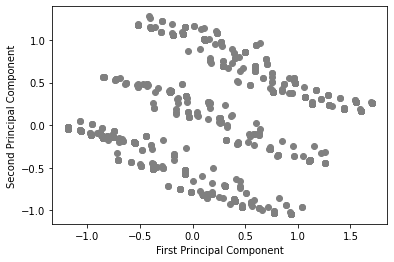

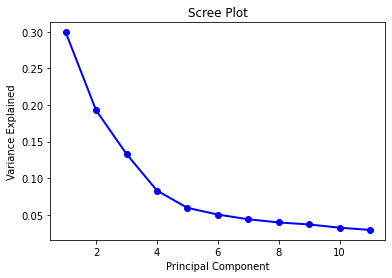

In [5]:
pca_result = pca.transform(yes_no_features)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c="grey")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()


PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

##K-means Clustering 

Finding opttimal number of clusters using Elbow method

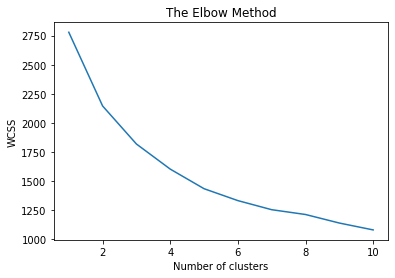

In [6]:
X=yes_no_features
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##Training K-means, Predicting and Visualizing Segmented Clusters

[3 2 2 ... 2 0 1]


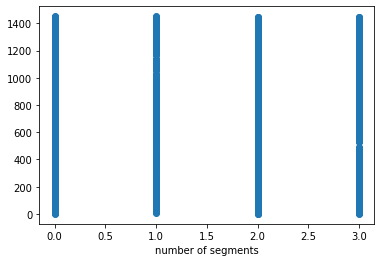

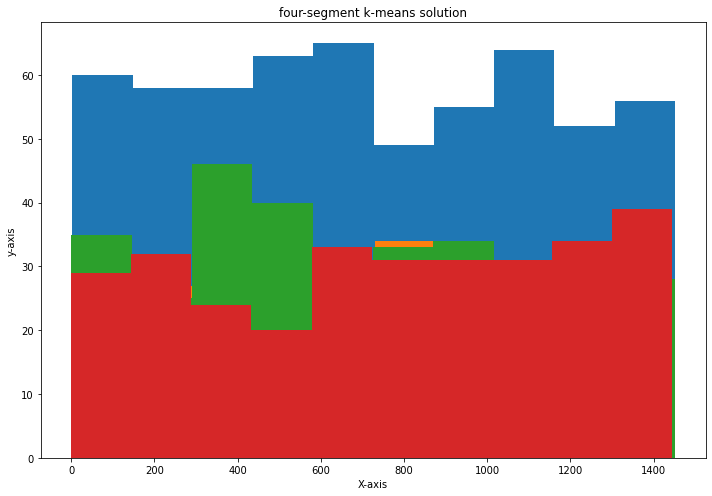

In [7]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)
y_kmeans = pd.DataFrame(y_kmeans)


predicted_yes_no_features = pd.concat([yes_no_features, pd.DataFrame(y_kmeans)], axis=1)

cluster_1 = []
cluster_2 = []
cluster_3 = []
cluster_4 = []
for column in y_kmeans:
     final_cluster = y_kmeans[column].tolist()

y_cord = []
for x in range (0,1453):
    y_cord.append(x)
    

plt.scatter(final_cluster,y_cord )
plt.xlabel("number of segments")
plt.show()

for i in range(len(final_cluster)):
    if final_cluster[i] == 0:
        cluster_1.append(i)
    elif final_cluster[i] == 1:
        cluster_2.append(i)
    elif final_cluster[i] == 2:
        cluster_3.append(i)
    elif final_cluster[i] == 3:
        cluster_4.append(i)
    else:
        pass

fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)




##Visualizing four Segmented Clusters

In [ ]:
axs.hist(cluster_1)
axs.hist(cluster_2)
axs.hist(cluster_3)
axs.hist(cluster_4)
plt.xlabel("X-axis")
plt.ylabel("y-axis")
plt.title('four-segment k-means solution')
plt.show()

##Multiple Linear Regression Model

In [8]:
#regression model

right_dataset = dataset.drop(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting'], axis=1)
final_dataset = pd.concat([yes_no_features, right_dataset], axis=1)  
final_dataset['Like']=final_dataset['Like'].replace(['+1'],1)
final_dataset['Like']=final_dataset['Like'].replace(['+2'],2)
final_dataset['Like']=final_dataset['Like'].replace(['+3'],3)
final_dataset['Like']=final_dataset['Like'].replace(['+4'],4)
final_dataset['Like']=final_dataset['Like'].replace(['I love it!+5'],5)
final_dataset['Like']=final_dataset['Like'].replace(['I hate it!-5'],-5)
final_dataset['Like'].astype(int)

model_dataset=final_dataset.drop(['Age', 'VisitFrequency','Gender'], axis=1)

X = model_dataset.iloc[:, :-1].values
y = model_dataset.iloc[:, -1].values
print(X)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=-1)

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[0 1 0 ... 1 0 0]
 [1 1 0 ... 1 0 0]
 [0 1 1 ... 1 1 0]
 ...
 [1 1 0 ... 1 0 0]
 [1 1 0 ... 0 1 0]
 [0 1 0 ... 1 0 1]]
[[0.7296707510453431 1]
 [3.1164484386644427 3]
 [0.5105618931099711 '-1']
 [-1.4349538259017427 '-3']
 [2.759327644979315 4]
 [2.7745068111880293 4]
 [2.978436502914686 3]
 [-3.0021824022131014 -5]
 [-2.8032790932707807 -5]
 [2.7868340896891297 '0']
 [2.759327644979315 4]
 [1.5186557510585976 3]
 [-0.624802476873261 '-1']
 [0.3066322013833134 1]
 [3.472991767896504 4]
 [3.83391672335791 5]
 [2.6218931736826248 '-1']
 [3.6299870316312512 4]
 [0.31575863802137616 '0']
 [2.978436502914686 3]
 [2.639845266986784 '-1']
 [2.759327644979315 3]
 [2.6218931736826248 4]
 [0.5105618931099711 '-2']
 [2.6218931736826248 5]
 [2.978436502914686 5]
 [2.858954124922157 5]
 [0.5105618931099711 '-2']
 [2.978436502914686 4]
 [-1.2678298888650024 '0']
 [3.3535093899039747 3]
 [2.6218931736826248 3]
 [-0.7001233539693261 '0']
 [-4.0370891588305495 -5]
 [-2.864747930916412 -5]
 [3.76742150

##Box plot of "Gender" vs "Age"

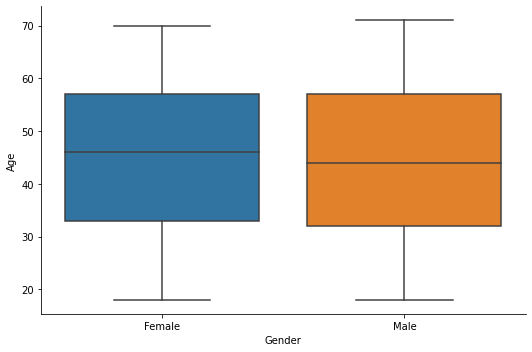

In [9]:
import seaborn as sns
sns.catplot(x="Gender",y="Age", kind="box", data=final_dataset, dodge=False, ci=None, height=5, aspect=1.5)
plt.show()